In [42]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [43]:
my_data_dir = 'C:\\Users\\Gauriel\\Gabikir99\\Desktop\\cell_images\\cell_images'

In [44]:
os.listdir(my_data_dir) 

['test', 'train']

In [45]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [46]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [47]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [48]:
os.listdir(train_path+'\\parasitized')[2]

'C100P61ThinF_IMG_20150918_144104_cell_164.png'

In [49]:
para_cell = train_path+'\\parasitized'+'\\C100P61ThinF_IMG_20150918_144104_cell_164.png'

In [50]:
para_img= imread(para_cell)

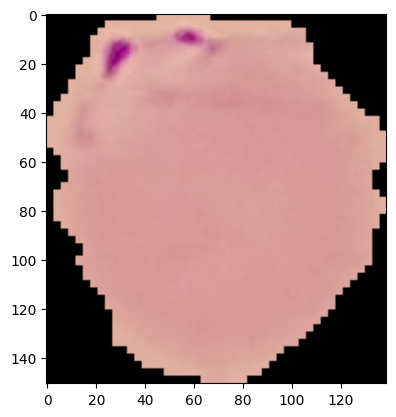

In [51]:
plt.imshow(para_img)

In [52]:
para_img.shape

(151, 139, 3)

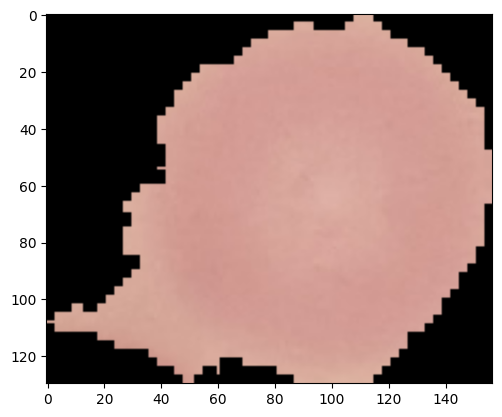

In [53]:
unifected_cell_path = train_path+'\\uninfected\\'+os.listdir(train_path+'\\uninfected')[5]
unifected_cell = imread(unifected_cell_path)
plt.imshow(unifected_cell)

In [54]:
len(os.listdir(train_path+'\\parasitized'))

12480

In [55]:
len(os.listdir(train_path+'\\uninfected'))

12480

**Average Dimension of the images**

In [56]:
unifected_cell.shape

(130, 157, 3)

In [57]:
para_img.shape

(151, 139, 3)

In [58]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

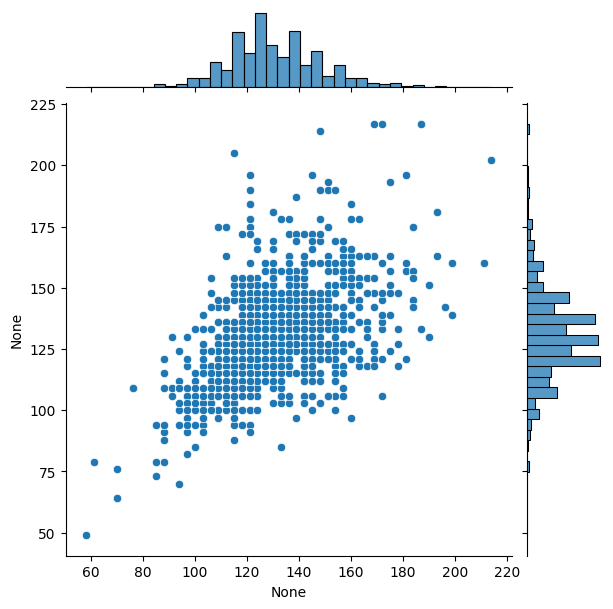

In [59]:
sns.jointplot(x=dim1,y=dim2)

In [60]:
np.mean(dim1)

np.float64(130.92538461538462)

In [61]:
np.mean(dim2)

np.float64(130.75)

In [62]:
image_shape = (130,130,3)

In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [64]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest' 
                              )

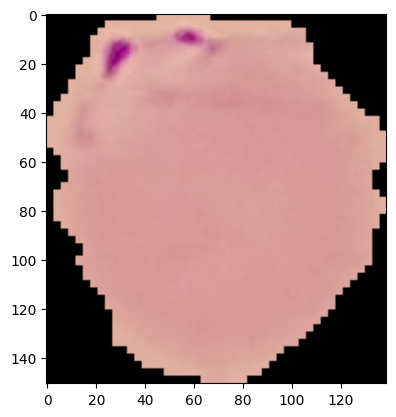

In [65]:
plt.imshow(para_img)

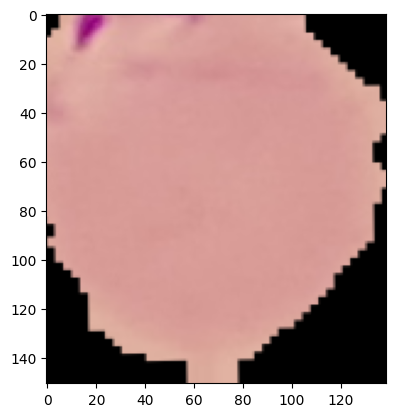

In [66]:
plt.imshow(image_gen.random_transform(para_img))

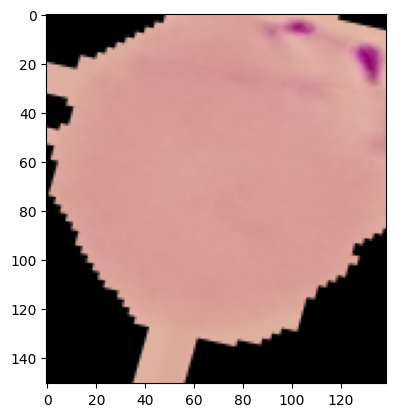

In [67]:
plt.imshow(image_gen.random_transform(para_img))

In [68]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [69]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


# Creating the Model

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense, Dropout, Activation, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2

In [71]:
model = Sequential()

model.add(Conv2D(16, (3,3), padding='same', kernel_regularizer=l2(1e-4), input_shape=image_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(GlobalAveragePooling2D())

model.add(Dense(64, kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(32, kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 130, 130, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 130, 130, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 130, 130, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 65, 65, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 65, 65, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 65, 65, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 65, 65, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,889 (38.63 KB)

 Trainable params: 9,601 (37.50 KB)

 Non-trainable params: 288 (1.12 KB)

## Early Stopping

In [73]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [74]:
early_stop = EarlyStopping(
    monitor='val_loss',    
    patience=5,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    filepath='best_model.h5',  
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

## Training the Model

In [75]:
batch_size = 32

In [76]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [77]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 2600 images belonging to 2 classes.


In [78]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [79]:
import warnings
warnings.filterwarnings('ignore')

In [81]:
results = model.fit(train_image_gen,epochs=10, validation_data=test_image_gen, callbacks=[early_stop, checkpoint])

Epoch 1/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.6170 - loss: 0.6922
Epoch 1: val_loss improved from inf to 0.59783, saving model to best_model.h5


780/780 ━━━━━━━━━━━━━━━━━━━━ 244s 312ms/step - accuracy: 0.6170 - loss: 0.6922 - val_accuracy: 0.6527 - val_loss: 0.5978
Epoch 2/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.8446 - loss: 0.4071
Epoch 2: val_loss did not improve from 0.59783
780/780 ━━━━━━━━━━━━━━━━━━━━ 332s 424ms/step - accuracy: 0.8446 - loss: 0.4071 - val_accuracy: 0.5681 - val_loss: 0.6171
Epoch 3/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - accuracy: 0.8838 - loss: 0.3233
Epoch 3: val_loss improved from 0.59783 to 0.27151, saving model to best_model.h5


780/780 ━━━━━━━━━━━━━━━━━━━━ 371s 475ms/step - accuracy: 0.8838 - loss: 0.3233 - val_accuracy: 0.8965 - val_loss: 0.2715
Epoch 4/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.8998 - loss: 0.2975
Epoch 4: val_loss did not improve from 0.27151
780/780 ━━━━━━━━━━━━━━━━━━━━ 268s 344ms/step - accuracy: 0.8998 - loss: 0.2975 - val_accuracy: 0.9212 - val_loss: 0.3573
Epoch 5/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.9099 - loss: 0.2740
Epoch 5: val_loss improved from 0.27151 to 0.25374, saving model to best_model.h5


780/780 ━━━━━━━━━━━━━━━━━━━━ 350s 449ms/step - accuracy: 0.9099 - loss: 0.2740 - val_accuracy: 0.9200 - val_loss: 0.2537
Epoch 6/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.9106 - loss: 0.2666
Epoch 6: val_loss did not improve from 0.25374
780/780 ━━━━━━━━━━━━━━━━━━━━ 218s 279ms/step - accuracy: 0.9106 - loss: 0.2666 - val_accuracy: 0.8077 - val_loss: 0.4489
Epoch 7/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.9240 - loss: 0.2464
Epoch 7: val_loss improved from 0.25374 to 0.22198, saving model to best_model.h5


780/780 ━━━━━━━━━━━━━━━━━━━━ 290s 371ms/step - accuracy: 0.9240 - loss: 0.2464 - val_accuracy: 0.9308 - val_loss: 0.2220
Epoch 8/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.9197 - loss: 0.2528
Epoch 8: val_loss did not improve from 0.22198
780/780 ━━━━━━━━━━━━━━━━━━━━ 234s 299ms/step - accuracy: 0.9197 - loss: 0.2528 - val_accuracy: 0.9108 - val_loss: 0.2470
Epoch 9/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.9243 - loss: 0.2375
Epoch 9: val_loss did not improve from 0.22198
780/780 ━━━━━━━━━━━━━━━━━━━━ 228s 291ms/step - accuracy: 0.9243 - loss: 0.2375 - val_accuracy: 0.8619 - val_loss: 0.3776
Epoch 10/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.9298 - loss: 0.2261
Epoch 10: val_loss did not improve from 0.22198
780/780 ━━━━━━━━━━━━━━━━━━━━ 254s 326ms/step - accuracy: 0.9298 - loss: 0.2261 - val_accuracy: 0.5035 - val_loss: 1.8278


<Axes: >

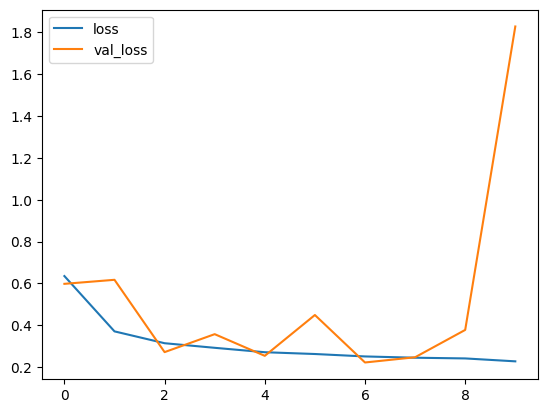

In [82]:
losses = pd.DataFrame(model.history.history)

losses[['loss','val_loss']].plot()

In [83]:
model.evaluate(test_image_gen)

82/82 ━━━━━━━━━━━━━━━━━━━━ 14s 162ms/step - accuracy: 0.9412 - loss: 0.1689


[0.22179964184761047, 0.931538462638855]

In [84]:
pred_probabilities = model.predict(test_image_gen)

82/82 ━━━━━━━━━━━━━━━━━━━━ 15s 170ms/step


In [ ]:
predictions = pred_probabilities > 0.80 # only predict malaria if the model is over 80% confident, to reduce false positives

In [87]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1300
           1       0.97      0.79      0.87      1300

    accuracy                           0.88      2600
   macro avg       0.89      0.88      0.88      2600
weighted avg       0.89      0.88      0.88      2600



In [88]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1263,   37],
       [ 276, 1024]])